<a href="https://colab.research.google.com/github/felippe-ribeiro/AulasIAFIAP/blob/main/Aula4_FeatureScaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Escalonamento de dados**

Afinal porque as escaladas dos dados são importantes ?


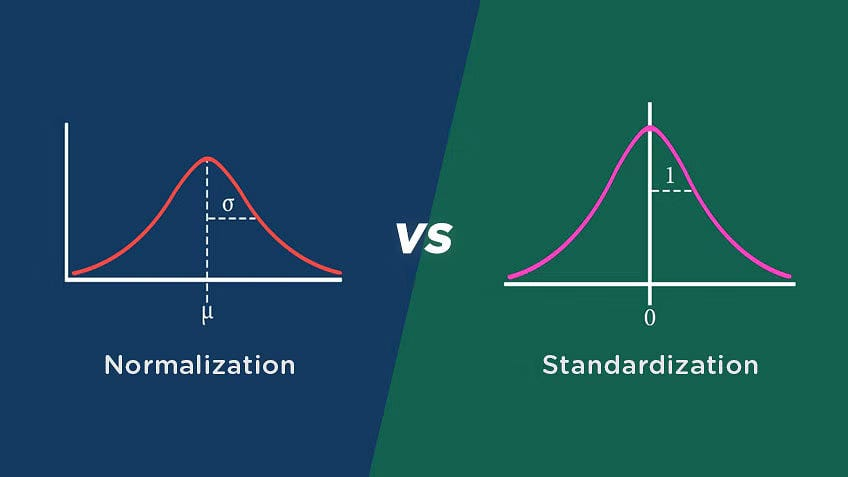

Para definirmos o que seriam as escalas dos dados, podemos dizer que as escalas referem-se à amplitude ou intervalo dos valores de um conjunto numérico de dados.

A técnica "feature scaling" é o processo de normalizar as escalas das features, colocando-as em uma escala comum. Existem duas abordagens comuns para fazer isso: a normalização (também conhecida como min-max scaling) e a padronização (também conhecida como z-score normalization). No aprendizado de máquina, muitos algoritmos podem ser sensíveis às escalas dos dados, podendo se confundir e achar que as escalas maiores, por exemplo, são mais relevantes do que as variáveis de escalas menores. Esse problema pode afetar principalmente algoritmos de redes neurais, onde a normalização dessas variáveis é obrigatória para a representação da dimensão ficar em uma mesma escala e contribuir com a convergência mais rápida dos dados. Não somente em deep learning essa técnica pode ajudar, mas também com algoritmos que lidam com distâncias, como o k-means, KNN, PCA, SVM e regressão logística por exemplo.

Na aula de hoje vamos aprender na prática como utilizar a normalização e a padronização para criar um modelo de machine learning. Vamos lá? 😀

Este conjunto de dados que vamos utilizar na aula de hoje, contém detalhes dos clientes de um banco e a variável alvo é uma variável binária que reflete o fato de o cliente ter deixado o banco (fechado sua conta) ou continuar a ser cliente. 💰

É o famoso modelo de churn!

Nessa aula vamos criar um modelo preditivo para prever se o cliente vai deixar o banco, e é claro, que vamos testar nossos dados com e sem escalonamento. 📏

Bem, logo já percebemos aqui que essa base de dados nos traz um desafio para ser resolvido com modelos supervisionados. Nessa aula não iremos focar muito nos detalhes dos modelos, mas não preocupe que na aula de Machine Learning Avançado você irá conhecer cada detalhe!

Vamos nessa aula focar em padronização e normalização, utilizando essa base como exemplo.

Vamos realizar o upload dessa base de dados para começar a construir o modelo!

In [26]:
import pandas as pd

df = pd.read_csv("Churn_Modelling.csv", sep=";")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
df.shape

(9865, 14)

Observe que essa base de dados contém um grande número de features (ao total são 14).

Dentre essas features disponíveis na base, muitas possuem proporções diferentes quando analisamos as escalas dos dados, por exemplo, idade, salário, o número de posse da pessoa, número de produtos, o score de crédito e assim por diante.

Será que essas variáveis têm uma amplitude tão diferente, pode impactar nosso modelo preditivo?

Bem, como próximo passo, vamos plotar alguns boxplots para analisarmos como está a distribuição dessas variáveis quantitativas para descobrirmos a variação de amplitude dos dados:

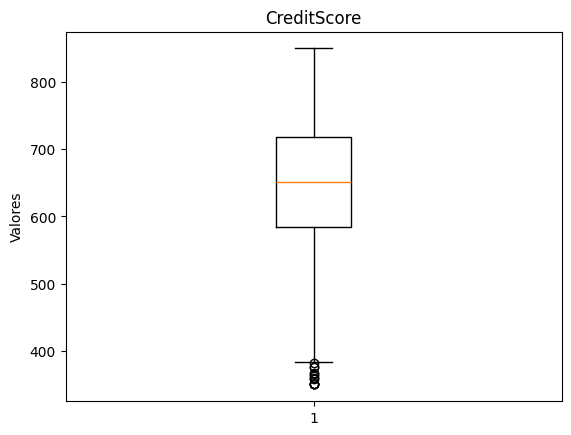

In [28]:
import matplotlib.pyplot as plt

#Criar gráfico de boxplot
plt.boxplot(df['CreditScore'])
plt.title('CreditScore')
plt.ylabel('Valores')
plt.show()

In [29]:
print(df['CreditScore'].min())
print(df['CreditScore'].max())

350
850


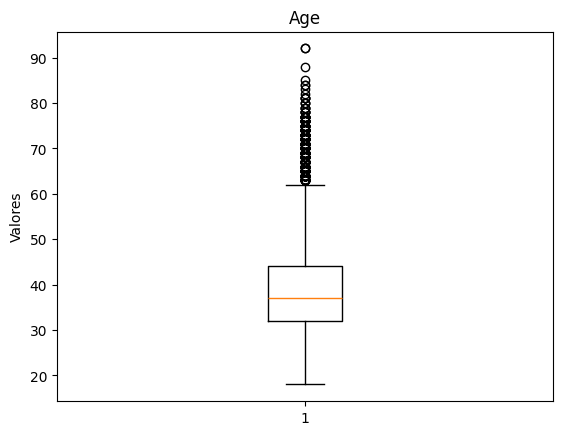

In [30]:
plt.boxplot(df['Age'])
plt.title('Age')
plt.ylabel('Valores')
plt.show()

In [31]:
print(df['Age'].min())
print(df['Age'].max())

18
92


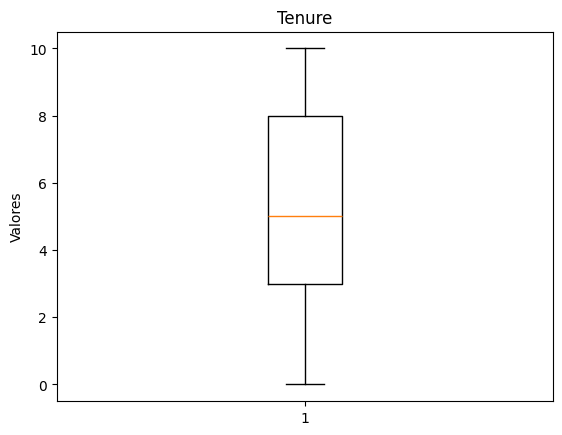

In [32]:
plt.boxplot(df['Tenure'])
plt.title('Tenure')
plt.ylabel('Valores')
plt.show()

In [33]:
print(df['Tenure'].min())
print(df['Tenure'].max())

0
10


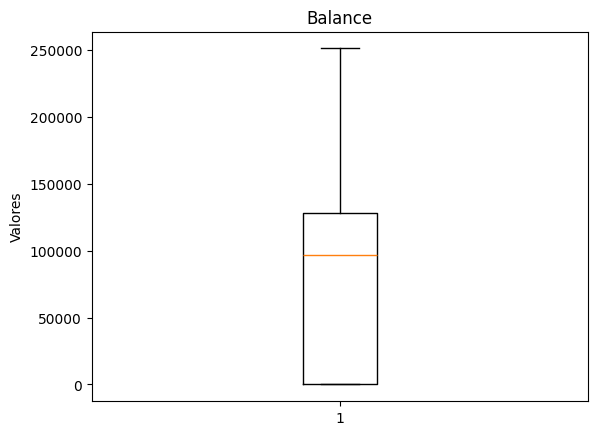

In [34]:
plt.boxplot(df['Balance'])
plt.title('Balance')
plt.ylabel('Valores')
plt.show()

In [35]:
print(df['Balance'].min())
print(df['Balance'].max())

0.0
250898.09


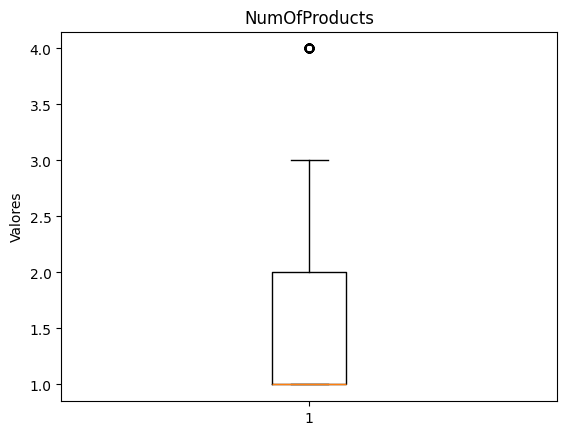

In [36]:
plt.boxplot(df['NumOfProducts'])
plt.title('NumOfProducts')
plt.ylabel('Valores')
plt.show()

In [37]:
print(df['NumOfProducts'].min())
print(df['NumOfProducts'].max())

1
4


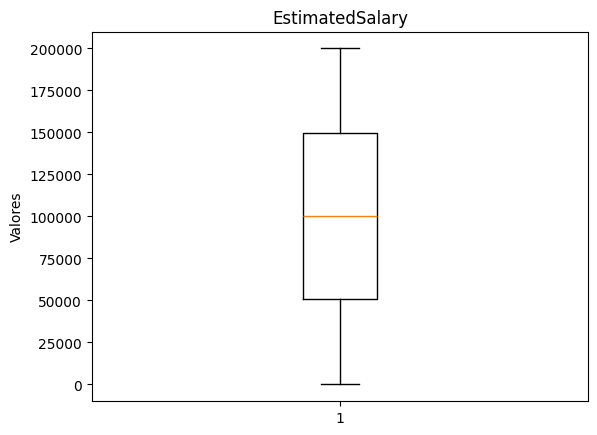

In [38]:
plt.boxplot(df['EstimatedSalary'])
plt.title('EstimatedSalary')
plt.ylabel('Valores')
plt.show()

In [39]:
print(df['EstimatedSalary'].min())
print(df['EstimatedSalary'].max())

11.58
199992.48


OK, concluímos que as escalas são bem diferentes! Falando sobre transformações nos dados, os dados em formato de string (as categorias) também passam por um tipo de transformação. Vamos aplicar nos dados em formato de texto o LabelEncoder. O LabelEncoder transforma rótulos de classes em números inteiros.

Mas por que é importante fazer esse tipo de transformação nas categorias? 🤔

Para os algoritmos de machine learning funcionarem, é necessário transformar a informação em um formato numérico para que o computador possa compreender o que estamos querendo apresentar.

In [42]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1111,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1173,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2032,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1816,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [43]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

#ajustar e transformar rotulos
df['Surname'] = label_encoder.fit_transform(df['Surname'])
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1111,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1173,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2032,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1816,850,2,0,43,2,125510.82,1,1,1,79084.10,0


OK, como próximo passo, antes de normalizar ou padronizar, vamos separar os dados em treino e teste:



In [45]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Exited']) #Variáveis características
y = df['Exited'] # O que eu quero prever. (Target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Quanto a esses detalhes de separação de dados em treino e teste, não se preocupe que em Machine Learning avançado você irá aprender cada passo! 😄

Vamos escalonar os dados? Importamos os escalonadores da biblioteca sklearn em preprocessing o StandardScaler e MinMaxScaler:

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

**Aplicando MinMax Scaler**

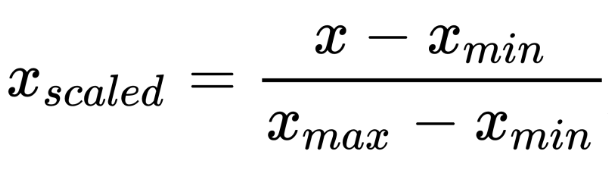

O escalonamento min-max (normalização) é muito simples! Basicamente os valores são deslocados e redimensionados para que acabem variando de 0 a 1. Observe a fórmula a seguir, esse cálculo subtrai o valor mínimo e divide pelo máximo, menos o mínimo.

In [47]:
scaler = MinMaxScaler() #chamando o metodo de normalização dos dados (0-1)

scaler.fit(X_train)

x_train_min_max_scaled = scaler.transform(X_train)
x_test_min_max_scaled = scaler.transform(X_test)


In [49]:
x_train_min_max_scaled

array([[0.35201121, 0.11669547, 0.88507719, ..., 1.        , 0.        ,
        0.34768845],
       [0.60456274, 0.78062996, 0.35849057, ..., 1.        , 0.        ,
        0.46923837],
       [0.89393636, 0.07744496, 0.17495712, ..., 0.        , 1.        ,
        0.56001428],
       ...,
       [0.53922353, 0.03258209, 0.5626072 , ..., 0.        , 0.        ,
        0.46092526],
       [0.08595157, 0.96788994, 0.59691252, ..., 1.        , 0.        ,
        0.48738065],
       [0.7273364 , 0.56228399, 0.84425386, ..., 1.        , 1.        ,
        0.26761502]])

Mas você deve estar se perguntando:

“por que é realizado o escalonamento (fit) na base treino e não na base de teste?”.

Bem, realizamos a transformação do escalonamento na base de treino para evitar que a base de teste fique exatamente igual às estatísticas da base de treino, o que evita “vazamento” desses dados. A base de teste em geral deve representar uma base de dados nunca vista antes pelo algoritmo, justamente para testar se o algoritmo consegue generalizar os dados.

Agora vamos testar com StandarScaler.

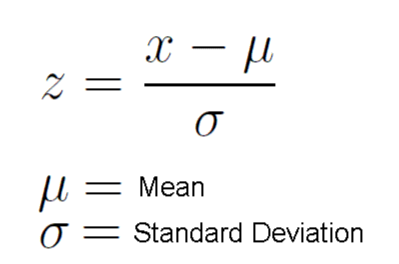

A padronização não vincula valores específicos nos mínimos e máximos, o que pode ser um ponto de atenção em alguns algoritmos (por exemplo, redes neurais). No entanto, a padronização é muito menos afetada por outliers. Na biblioteca do Scikit-Learn temos a padronização em StandardScaler.

In [50]:
scaler = StandardScaler() # Chamando o metodo de padronizacao dos dados (média e std)
scaler.fit(X_train) #qual média e std será utilizado para o escalonamento

x_train_standard_scaled = scaler.transform(X_train)
x_test_standard_scaled = scaler.transform(X_test)

In [51]:
x_train_standard_scaled

array([[-0.50073964, -1.33102082,  1.28295781, ...,  0.64920701,
        -1.04034701, -0.53624445],
       [ 0.38340744,  0.98483691, -0.54107698, ...,  0.64920701,
        -1.04034701, -0.11539063],
       [ 1.39646344, -1.46792981, -1.17681548, ..., -1.54034073,
         0.96121774,  0.19891141],
       ...,
       [ 0.15466416, -1.62441517,  0.16595931, ..., -1.54034073,
        -1.04034701, -0.1441739 ],
       [-1.43217667,  1.63801503,  0.28478893, ...,  0.64920701,
        -1.04034701, -0.05257492],
       [ 0.81322062,  0.22322832,  1.14155055, ...,  0.64920701,
         0.96121774, -0.81349026]])

In [52]:
from sklearn.neighbors import KNeighborsClassifier

Vamos testar o algoritmo sem os escalonadores e validar os resultados


In [53]:
model = KNeighborsClassifier(n_neighbors=3)

#Treinar o modelo
model.fit(X_train, y_train)

#fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

Acurácia: 0.76


In [56]:
#Testando com Normalização:
model_min_max = KNeighborsClassifier(n_neighbors=3)

#Treinar o modelo
model_min_max.fit(x_train_min_max_scaled, y_train)

# FAzer previsões no conjunto de teste
y_pred_min_max = model.predict(x_test_min_max_scaled)

accuracy_min_max = accuracy_score(y_test, y_pred_min_max)
print(f'Acurácia: {accuracy_min_max:.2f}')

Acurácia: 0.81


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [59]:
#Testando com padronização
model_standard = KNeighborsClassifier(n_neighbors=3)

#treinar o modelo
model_standard.fit(x_train_standard_scaled, y_train)

#Fazendo previsões no conjunto de teste
y_pred_standard = model.predict(x_test_standard_scaled)

accuracy_standard = accuracy_score(y_test, y_pred_standard)
print(f'Acurácia: {accuracy_standard:.2f}')

Acurácia: 0.81


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Os escalonadores realmente mudam o resultado de alguns algoritmos! Nessa aula aprendemos a importância dos escalonadores. Que tal você testar em com mais tipos de algoritmos